<h1>ECE 445: Machine Learning for Engineers - Albert Tran</h1>
<h2>Mini Jupyter Exercise #5</h2>
<h3>k-Fold Cross Validation and Naive Bayes Classification</h3>
<br>
<strong>Objective:</strong> In this exercise, we will reinforce the concepts of standardization of raw data, k-Fold Cross Validation and Naive Bayes Classification.
<br>
<h4>Wine Data</h4>
In this exercise, we will use the Wine dataset from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine). This is a three-class dataset comprising 178 data samples, with each sample described by a total of 13 (integer- or real-valued) attributes (i.e., each data sample is 13-dimensional). The three class labels of 0, 1, and 2 correspond to three different cultivars that gave rise to the wines included in the dataset. This dataset comes standard with the sklearn Python package, and can be loaded using the following code:

In [1]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)

<h4>Standardization of Data</h4>
In an earlier exercise (Exercise #2), we discussed the importance of centering of data for feature learning and extraction using principal component analysis (PCA). In many datasets, especially those in which a sample is given by attributes (raw features) that have different scaling, it is also important to both center and normalize the data before feature learning using PCA. (Refer to “Scaling the Variables” within Sec. 10.2.3 of “An Introduction to Statistical Learning” for more discussion on this topic.) In this exercise, we will focus on normalization that makes the (empirical) variance of each attribute unity. Data that has both been centered and normalized to have zero mean and unit variance at the attribute (raw feature) level is often referred to as standardized data.

Centering the wine dataset so that each attribute has zero (empirical) mean.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

mean = samples.mean(0) #Mean vector of data
m = len(samples[0]) #Dimensionality of data

centered_wine_data = np.zeros((len(samples), m))

for i in range(len(samples)):
    centered_wine_data[i] = samples[i] - mean

Defining PCA Function

In [3]:
#Define PCA Function
def pca(data, num_of_prin_comp, data_orientation = "row"):
    num_of_data = len(data)
    dim_of_data = len(data[0])
    if data_orientation == "row":
        transposed_data = np.transpose(data) #Changes dataset so that data samples are column vectors
    mean = transposed_data.mean(1)  #Mean Vector
    centered_data = np.zeros((dim_of_data,num_of_data))

    for i in range(num_of_data):
        centered_data[:,i] = transposed_data[:,i] - mean  #Centering Data

    svd_u, svd_sigma, svd_v = np.linalg.svd(centered_data, full_matrices = True)  # Singular Value Decompostion

    u = np.zeros((dim_of_data,num_of_prin_comp))
    s = np.zeros((num_of_prin_comp,num_of_prin_comp))

    for i in range(dim_of_data):
        for j in range(num_of_prin_comp):
            u[i,j] = svd_u[i,j] #First r singular vectors of U
    for i in range(num_of_prin_comp):
        s[i,i] = svd_sigma[i] #Largest r singular values
    
    w = np.matrix(u)*np.matrix(s) #Principal Component Matrix with Principal Axes as Columns
    for i in range(num_of_prin_comp):
        w[:,i] = w[:,i]/np.linalg.norm(w[:,i]) #Normalizing Each Principal Component


    transformed_data = np.transpose(np.transpose(w)*centered_data) #Feature Vectors
    return transformed_data

Computation two-dimensional PCA features of the centered wine dataset.

In [4]:
wine_ctr_pca = pca(centered_wine_data, 2, "row")

Display of the two-dimensional features of wine data samples as points on a two-dimensional scatter plot. All points corresponding to:<br> (i) label ‘0’ as red squares, <br>
(ii) label ‘1’ as green triangles,<br>
and (iii) label ‘2’ as blue circles.

[]

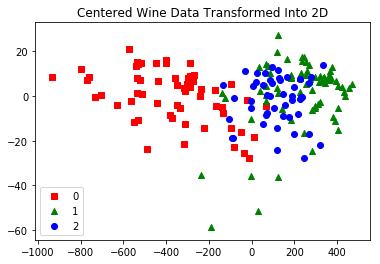

In [5]:
for i in range(len(samples)):
    if labels[i] == 0:
        zero = plt.scatter(wine_ctr_pca[i,0], wine_ctr_pca[i,1], c="red", marker="s")
    elif labels[i] == 1:
        one = plt.scatter(wine_ctr_pca[i,0], wine_ctr_pca[i,1], c="green", marker="^")
    elif labels[i] == 2:
        two = plt.scatter(wine_ctr_pca[i,0], wine_ctr_pca[i,1], c="blue", marker="o")
plt.legend((zero, one, two), ("0", "1", "2"))
plt.title("Centered Wine Data Transformed Into 2D")
plt.plot()